In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score

In [7]:
dataset = pd.read_csv("diabetes.csv")
print(dataset.shape)
dataset.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# replace zeros
zeros_not_accepted = dataset.columns[1:6]
for column in zeros_not_accepted:
    dataset[column] = dataset[column].replace(0, np.nan)
    dataset[column].fillna(int(dataset[column].mean(skipna=True)),inplace=True)

<ipython-input-8-0fbc04e7a968>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna(int(dataset[column].mean(skipna=True)),inplace=True)


In [9]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [10]:
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

614
154
614
154


In [12]:
#  standard scalar bring every data to 1 to -1
dataset.head(25)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,155.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,155.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,155.0,32.0,0.232,54,1


In [13]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [14]:
classifier  = KNeighborsClassifier(n_neighbors=11, p=2, metric="euclidean")


In [15]:
classifier.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [16]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
# in confusion matrix =>  first true test value is passed and then predicted value from the model

cm = confusion_matrix(y_test, y_pred)
print( "cm => ", cm)
f1Score = f1_score(y_test, y_pred)
print("F1_Score ->", f1Score)

cm =>  [[94 13]
 [15 32]]
F1_Score -> 0.6956521739130435


In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy_score = ", accuracy)

accuracy_score =  0.8181818181818182


Adding 9 Models and compare the stats of that

In [19]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=11, p=2, metric="euclidean"),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "MLP Classifier": MLPClassifier(max_iter=1000),
    "AdaBoost": AdaBoostClassifier()
}

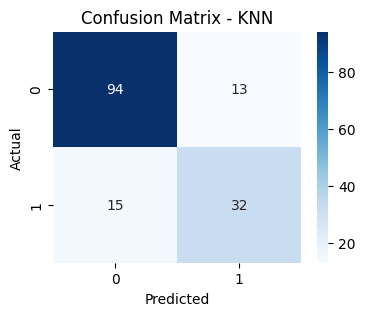

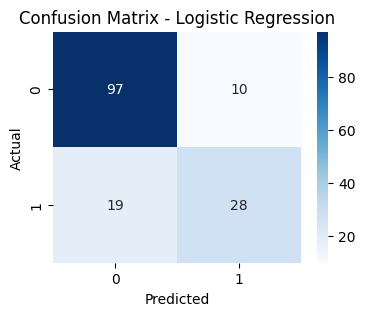

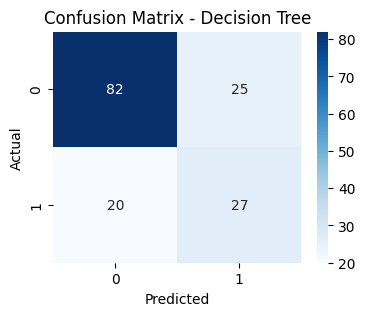

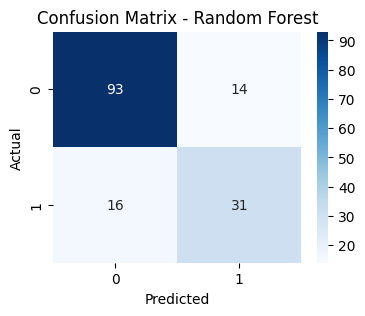

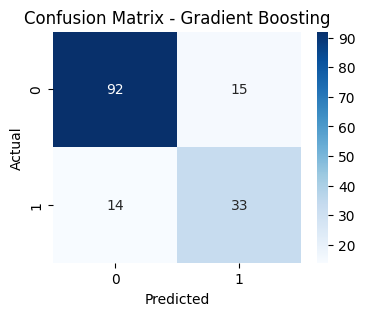

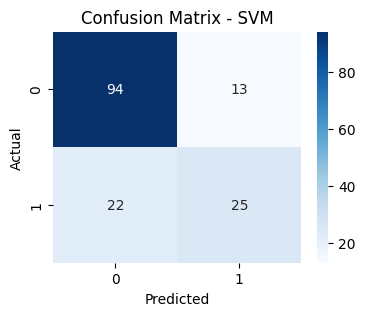

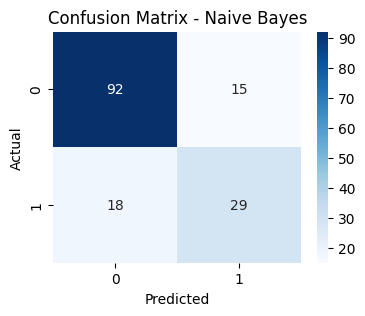

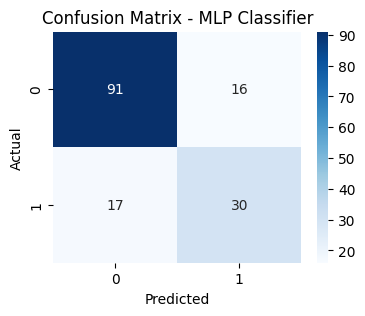

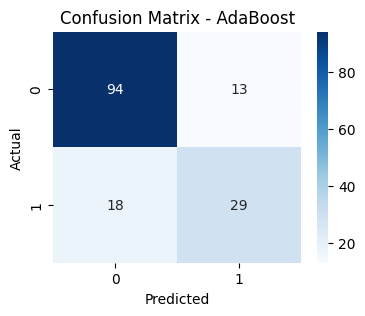

              Model  Accuracy  F1 Score  Precision   Recall
                KNN  0.818182  0.695652   0.711111 0.680851
  Gradient Boosting  0.811688  0.694737   0.687500 0.702128
      Random Forest  0.805195  0.673913   0.688889 0.659574
Logistic Regression  0.811688  0.658824   0.736842 0.595745
           AdaBoost  0.798701  0.651685   0.690476 0.617021
     MLP Classifier  0.785714  0.645161   0.652174 0.638298
        Naive Bayes  0.785714  0.637363   0.659091 0.617021
                SVM  0.772727  0.588235   0.657895 0.531915
      Decision Tree  0.707792  0.545455   0.519231 0.574468


In [24]:
# Store performance metrics
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall
    })

    # Plot confusion matrix
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Convert to DataFrame for easy display
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1 Score", ascending=False)
print(results_df.to_string(index=False))